In [1]:
import numpy as np
import math as mt
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### Задание 1

In [2]:
N = 10_000
STOP = 100_000
p = 1 / 3

cnt = 0
for _ in tqdm(range(N)):
    cur = 1
    while 0 < cur < STOP:
        cur = np.sum(st.geom(p).rvs(cur) - 1)
    if cur == 0:
        cnt += 1

100%|████████████████████████████████████| 10000/10000 [00:38<00:00, 259.49it/s]


In [3]:
print(f"Теоретическая вероятность: {p / (1 - p) : .4f}")
print(f"Симулированная вероятность: {cnt / N}")

Теоретическая вероятность:  0.5000
Симулированная вероятность: 0.5021


### Задание 2

In [17]:
N = 1000
STOP = 50
p = 0.5

cnt = np.zeros((N, STOP), dtype=int)
for i in tqdm(range(N)):
    cur = 1
    for j in range(STOP):
        cur = np.sum(st.geom(p).rvs(cur) - 1)
        cnt[i][j] = cur

100%|██████████████████████████████████████| 1000/1000 [00:09<00:00, 100.94it/s]


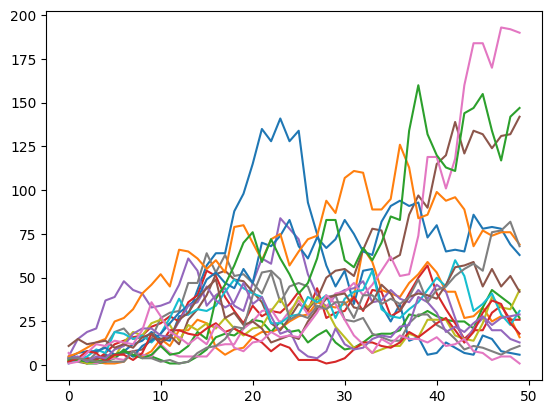

In [18]:
alive = cnt[:, -1] > 0
for trace in cnt[alive]:
    plt.plot(trace)

In [19]:
alive.sum()

18

In [6]:
var = (1 - p) / p**2
print(f"Теоретическая вероятность вырождения: ~{2 / (STOP * var) : .3f}")
print(f"Симулированная вероятность вырождения: {alive.sum() / N}")

Теоретическая вероятность вырождения: ~ 0.020
Симулированная вероятность вырождения: 0.021


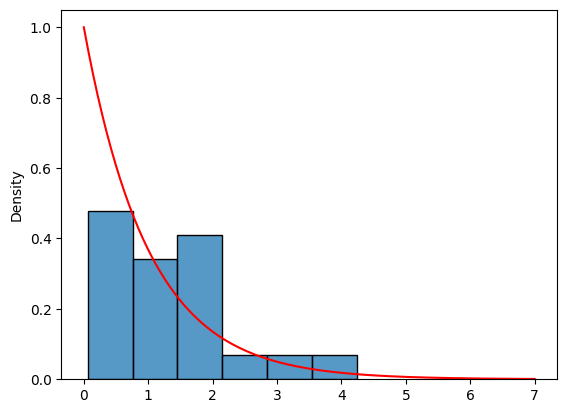

In [7]:
sns.histplot(2 * cnt[alive, -1] / (STOP * var), stat="density")
xs = np.linspace(0, 7, 200)
ys = st.expon().pdf(xs)
plt.plot(xs, ys, c='r');

In [8]:
N = 10000
STOP = 50

for p in [0.501, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54]:
    cnt = 0
    for _ in tqdm(range(N)):
        cur = 1
        for __ in range(STOP):
            cur = np.sum(st.geom(p).rvs(cur) - 1)
            if cur == 0:
                cnt += 1
                break
    print(f"p = {p : .3f} : {N - cnt}")

100%|███████████████████████████████████| 10000/10000 [00:09<00:00, 1096.06it/s]


p =  0.501 : 177


100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1129.11it/s]


p =  0.505 : 106


100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1168.63it/s]


p =  0.510 : 79


100%|███████████████████████████████████| 10000/10000 [00:07<00:00, 1387.09it/s]


p =  0.515 : 27


100%|███████████████████████████████████| 10000/10000 [00:06<00:00, 1436.19it/s]


p =  0.520 : 15


100%|███████████████████████████████████| 10000/10000 [00:06<00:00, 1569.28it/s]


p =  0.525 : 5


100%|███████████████████████████████████| 10000/10000 [00:06<00:00, 1633.64it/s]


p =  0.530 : 1


100%|███████████████████████████████████| 10000/10000 [00:05<00:00, 1743.22it/s]


p =  0.535 : 3


100%|███████████████████████████████████| 10000/10000 [00:05<00:00, 1813.71it/s]

p =  0.540 : 0


### Задание 3

In [9]:
N = 100
STOP = 20
p = 0.45

cnt = np.zeros((N, STOP), dtype=int)
for i in tqdm(range(N)):
    cur = 1
    for j in range(STOP):
        cur = np.sum(st.geom(p).rvs(cur) - 1)
        cnt[i][j] = cur

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 237.69it/s]


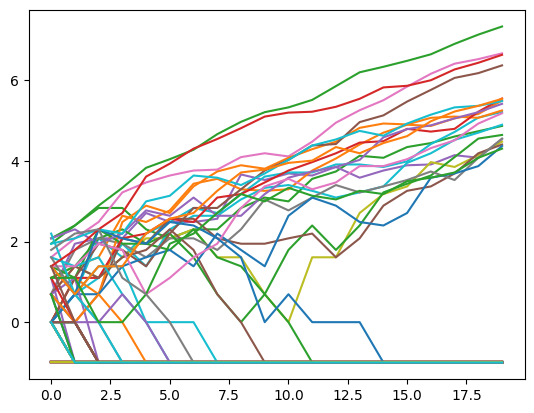

In [10]:
cnt = np.maximum(cnt, 1 / mt.e) 
for trace in cnt:
    plt.plot(np.log(trace))

### Задание 4

In [11]:
N = 1000
STOP = 50
p = 0.6

cnt = np.zeros((N, STOP), dtype=int)
for i in tqdm(range(N)):
    cur = 1
    for j in range(STOP):
        cur = np.sum(st.geom(p).rvs(cur + 1) - 1)
        cnt[i][j] = cur

100%|███████████████████████████████████████| 1000/1000 [00:10<00:00, 95.55it/s]


In [12]:
for k in range(6):
    print(f"k = {k}: {np.sum(cnt[:, -1] == k) / N}")

k = 0: 0.348
k = 1: 0.224
k = 2: 0.13
k = 3: 0.087
k = 4: 0.068
k = 5: 0.053


### Задание 5

In [13]:
STOP = 20
ps = np.linspace(0.35, 0.5, 200)
mle_ps = np.zeros(ps.size)

for i, p in tqdm(enumerate(ps)):
    while True:
        cur = 1
        trip = np.zeros(STOP, dtype=int)
        for j in range(STOP):
            cur = st.nbinom(cur, p).rvs()
            trip[j] = cur
            if cur == 0:
                break
        if cur:
            break
    mle_ps[i] = 1 - trip.sum() / (1 + 2 * trip.sum() - trip[-1])

200it [00:01, 141.31it/s]


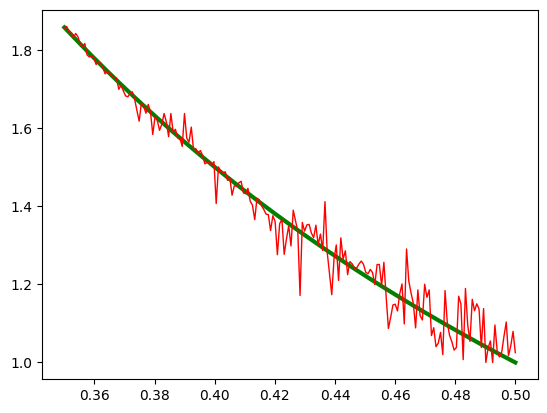

In [14]:
plt.plot(ps, (1-ps)/ps, c='g', lw=3)
plt.plot(ps, (1-mle_ps)/mle_ps, c='r', lw=1);

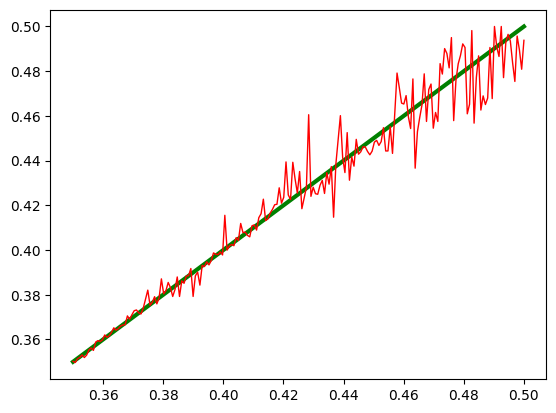

In [15]:
plt.plot(ps, ps, c='g', lw=3)
plt.plot(ps, mle_ps, c='r', lw=1);

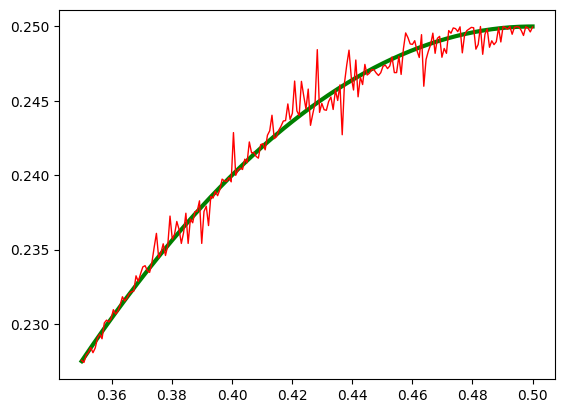

In [16]:
plt.plot(ps, (1-ps)*ps, c='g', lw=3)
plt.plot(ps, (1-mle_ps)*mle_ps, c='r', lw=1);